In [1]:
from Cosmo import distance
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


In [2]:
#setup functions to convert theta --> r_perp
d = distance(.25,.75)

def r(z1,z2,theta):
    
    x1=d.dc(z1)
    x2=d.dc(z2)
    
    th=np.sqrt(x1**2 + x2**2 - 2.*x1*x2*np.cos(np.radians(theta)))
    return th

def mu(z1,z2,theta):
    x1=d.dc(z1)
    x2=d.dc(z2)
    
    
    th= np.abs(x1**2 - x2**2)/np.sqrt((x1**2 + x2**2)**2 - (2.*x1*x2*np.cos(np.radians(theta)))**2)
    return th


def combine_w_theta(fname,photoz,bias=1.8,beta=0.4):
    '''
    Takes in the output of w_model code
    at a particular photoz and
    combines the different moments to
    output theta, w(theta). In case of a cross w(theta)
    photoz should be the mean photoz for the two tomographic bins
    
    '''
       
    #from Kwan
    #f = Omegam_a( amean )**0.55
    ff = d.omz(photoz)**.557
    betad = ff/bias
    betaf = betad/beta

    theta, w0, w2, w4  = np.loadtxt(fname, usecols=( 0,1,2,3 ), unpack=True )
    b2_term = w0
    bf_term = ff * ( 2./3.*w0 + 4./3.*w2 )
    f2_term = ff**2 * ( 1/5.*w0 + 4/7.*w2 + 8/35.*w4)
    w_full = betaf**2 * b2_term  +  betaf * bf_term  +  f2_term
    
    return (theta,w_full)
    

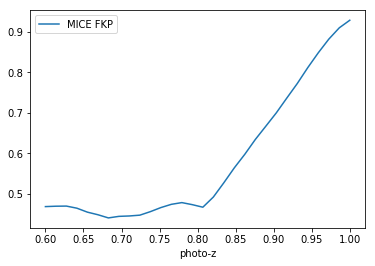

In [3]:
#use Y1 FKP weights, sigmaz,bz from Santi
y1wtfile=np.loadtxt('zwt_Y1_MICE.txt')
funcfkp= interp1d(y1wtfile[:,0], y1wtfile[:,1], kind='cubic') 

zz=np.linspace(0.6,1.0,30)
plt.figure()
plt.plot(zz,funcfkp(zz),label='MICE FKP')
plt.legend(loc='upper left')
plt.xlabel('photo-z')
plt.show()

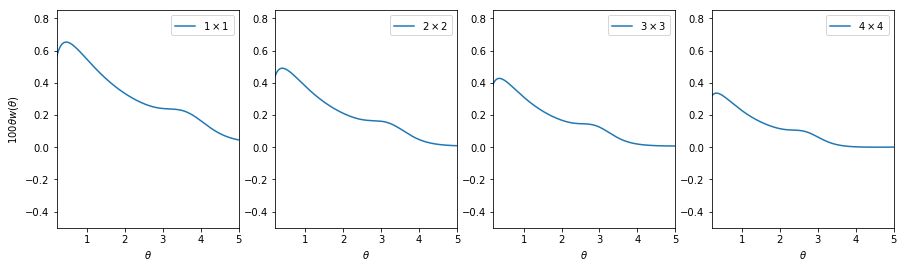

In [4]:
#plot auto correlations
th1,wth1=combine_w_theta('outbin_1.txt',photoz=0.65)
th2,wth2=combine_w_theta('outbin_2.txt',photoz=0.75)
th3,wth3=combine_w_theta('outbin_3.txt',photoz=0.85)
th4,wth4=combine_w_theta('outbin_4.txt',photoz=0.95)


plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
plt.plot(th1,100.*th1*wth1,label=r'$1\times 1 $')
plt.xlim(0.2,5.)
plt.ylim(-0.5,0.85)
plt.legend(loc='upper right')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$100 \theta w(\theta)$')

plt.subplot(1,4,2)
plt.plot(th2,100.*th2*wth2,label=r'$2\times 2 $')
plt.xlim(0.2,5.)
plt.ylim(-0.5,0.85)
plt.xlabel(r'$\theta$')
plt.legend(loc='upper right')

plt.subplot(1,4,3)
plt.plot(th3,100.*th3*wth3,label=r'$3\times 3 $')
plt.xlim(0.2,5.)
plt.ylim(-0.5,0.85)
plt.xlabel(r'$\theta$')
plt.legend(loc='upper right')

plt.subplot(1,4,4)
plt.plot(th4,100.*th4*wth4,label=r'$4\times 4 $')
plt.xlim(0.2,5.)
plt.ylim(-0.5,0.85)
plt.xlabel(r'$\theta$')
plt.legend(loc='upper right')

plt.show()

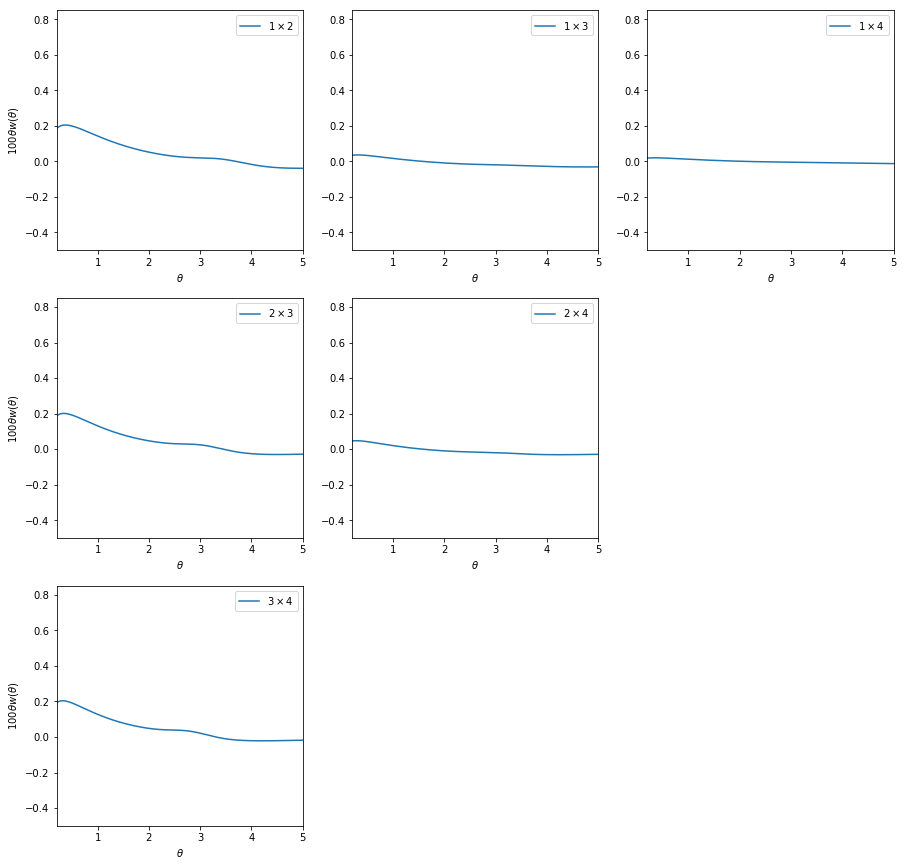

In [5]:
#plot cross-correlations
th12,wth12=combine_w_theta('outbin_1c2.txt',photoz=0.7)
th13,wth13=combine_w_theta('outbin_1c3.txt',photoz=0.75)
th14,wth14=combine_w_theta('outbin_1c4.txt',photoz=0.8)
th23,wth23=combine_w_theta('outbin_2c3.txt',photoz=0.8)
th24,wth24=combine_w_theta('outbin_2c4.txt',photoz=0.85)
th34,wth34=combine_w_theta('outbin_3c4.txt',photoz=0.9)

plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.plot(th12,100.*th12*wth12,label=r'$1\times 2 $')
plt.xlim(0.2,5.)
plt.ylim(-0.5,0.85)
plt.legend(loc='upper right')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$100 \theta w(\theta)$')

plt.subplot(3,3,2)
plt.plot(th13,100.*th13*wth13,label=r'$1\times 3 $')
plt.xlim(0.2,5.)
plt.ylim(-0.5,0.85)
plt.xlabel(r'$\theta$')
plt.legend(loc='upper right')

plt.subplot(3,3,3)
plt.plot(th14,100.*th14*wth14,label=r'$1\times 4 $')
plt.xlim(0.2,5.)
plt.ylim(-0.5,0.85)
plt.xlabel(r'$\theta$')
plt.legend(loc='upper right')

plt.subplot(3,3,4)
plt.plot(th23,100.*th23*wth23,label=r'$2\times 3 $')
plt.xlim(0.2,5.)
plt.ylim(-0.5,0.85)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$100 \theta w(\theta)$')
plt.legend(loc='upper right')

plt.subplot(3,3,5)
plt.plot(th24,100.*th24*wth24,label=r'$2\times 4 $')
plt.xlim(0.2,5.)
plt.ylim(-0.5,0.85)
plt.xlabel(r'$\theta$')
plt.legend(loc='upper right')

plt.subplot(3,3,7)
plt.plot(th34,100.*th34*wth34,label=r'$3\times 4 $')
plt.xlim(0.2,5.)
plt.ylim(-0.5,0.85)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$100 \theta w(\theta)$')
plt.legend(loc='upper right')

plt.show()

In [6]:
dir = '/home/nil/Dropbox/w_model_code/'

rperp_bin_edges=np.linspace(10.,230.,50)
mid_rperp=np.array([0.5*(rperp_bin_edges[i] + rperp_bin_edges[i+1]) for i in range(len(rperp_bin_edges)-1)])

xi_rperp=np.zeros(len(mid_rperp))


Nbigbin=4

zph_bin_edge=np.linspace(0.6,1.0, Nbigbin+1)
midzph=[0.5*(zph_bin_edge[i] + zph_bin_edge[i+1]) for i in range(Nbigbin)]
print midzph

fbasename='outbin_'

weight_sum=0.

for i in range(0,len(midzph)):
    
    for j in range(i,len(midzph)):
    
        z1=midzph[i]
        z2=midzph[j]
        print z1,z2
        zmean=0.5*(z1+z2)
        
        if z1==z2 :
            fname=fbasename + str(i+1)+'.txt'
            
        else :
            fname=fbasename + str(i+1)+'c'+ str(j+1) + '.txt'
            
        print fname
        th,wth=combine_w_theta(fname,photoz=zmean) 
        rperp=r(z1,z2,th)*np.sqrt(1-mu(z1,z2,th)**2.)
        wth_weight=wth*funcfkp(z1)*funcfkp(z2)
        weight_sum+=funcfkp(z1)*funcfkp(z2)
        
        xi_rperp+=np.histogram(rperp,bins=rperp_bin_edges,weights=wth_weight)[0]
            
        
xi_rperp/=weight_sum        
        
                          

[0.64999999999999991, 0.75, 0.85000000000000009, 0.94999999999999996]
0.65 0.65
outbin_1.txt
0.65 0.75
outbin_1c2.txt
0.65 0.85
outbin_1c3.txt
0.65 0.95
outbin_1c4.txt
0.75 0.75
outbin_2.txt
0.75 0.85
outbin_2c3.txt
0.75 0.95
outbin_2c4.txt
0.85 0.85
outbin_3.txt
0.85 0.95
outbin_3c4.txt
0.95 0.95
outbin_4.txt


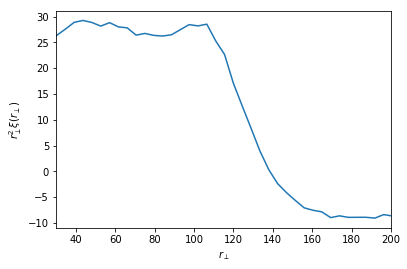

In [7]:
plt.figure()
plt.plot(mid_rperp,(mid_rperp**2)*xi_rperp)
plt.xlabel(r'$r_{\perp}$')
plt.ylabel(r'$r_{\perp}^{2}\xi(r_{\perp})$')
plt.xlim(30,200)
plt.show()